# Word Cloud for Visualization

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import contractions
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from textacy.preprocessing.replace import urls, hashtags, numbers, emails, emojis, currency_symbols
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import spacy
import warnings
warnings.filterwarnings('ignore')

## Import data

In [230]:
data = pd.read_csv("C:/Users/nat_k/Desktop/Class/Fall2022/DSO560/project/Data/Sample data/podcast_sample_50000.csv", lineterminator = '\n', index_col = 0)

In [263]:
# Make a copy of original data
df = data.copy()

In [264]:
# Assign sentiment
# Negative (0) is rating 1-3
# Positive (1) is rating 4-5
def sentiment(num):
    if num < 4:
        return 0
    else:
        return 1
df['sentiment'] = df['rating'].apply(sentiment)
df.head()

,podcast_id,title,content,rating,author_id,created_at,itunes_id,slug,itunes_url,podcast_title,category,sentiment
0,b313ef8ef0d5b64290d3036ff1bbf2d2,감성 라디오 음악도시,미국 서부에 있는 유학생이에요. 성시경씨 제대 후 라디오 복귀만 기다려오다가 6 월...,5,664CCA7142E9AE8,2011-09-14T13:25:46-07:00,442838670,fm-%EC%9D%8C%EC%95%85%EB%8F%84%EC%8B%9C-%EC%A2...,https://podcasts.apple.com/us/podcast/fm-%EC%9...,FM 음악도시(종영),music,1
1,abfb842993be20d21bfae7103addc5e9,They’ve really cut back on the content this se...,Last season there was a new pod every 3-4 days...,1,AD790CE113DCBC1,2018-04-11T13:46:47-07:00,1015394113,the-good-phight-for-philadelphia-phillies-fans,https://podcasts.apple.com/us/podcast/the-good...,The Good Phight: for Philadelphia Phillies fans,sports,0
2,ebdf879a424547d01862a9bbba18a0f3,Good info. source...,Bob brings a lot of knowledge to any firearm d...,4,E223A4B2642C970,2010-01-19T08:11:43-07:00,333180229,handgun-world-podcast,https://podcasts.apple.com/us/podcast/handgun-...,Handgun World Podcast,news,1
3,ab2fdb7db023b223d870487165d11ff3,Mixed,They have lost much of thier credibility by de...,3,E1E7DBE750D119E,2021-01-28T12:21:49-07:00,971901464,wsj-opinion-potomac-watch,https://podcasts.apple.com/us/podcast/wsj-opin...,WSJ Opinion: Potomac Watch,news,0
4,ca601bd1524322d0527b16adf2738ff3,Try it now!,Even better than I expected. I was interested ...,5,D7CA4858AFA2CFC,2017-08-24T10:55:20-07:00,1257821731,conversations-with-people-who-hate-me,https://podcasts.apple.com/us/podcast/conversa...,Conversations with People Who Hate Me,society,1


In [265]:
# Combine title and content
df['title_content'] = df['title'] + " " + df['content']
df.head()

,podcast_id,title,content,rating,author_id,created_at,itunes_id,slug,itunes_url,podcast_title,category,sentiment,title_content
0,b313ef8ef0d5b64290d3036ff1bbf2d2,감성 라디오 음악도시,미국 서부에 있는 유학생이에요. 성시경씨 제대 후 라디오 복귀만 기다려오다가 6 월...,5,664CCA7142E9AE8,2011-09-14T13:25:46-07:00,442838670,fm-%EC%9D%8C%EC%95%85%EB%8F%84%EC%8B%9C-%EC%A2...,https://podcasts.apple.com/us/podcast/fm-%EC%9...,FM 음악도시(종영),music,1,감성 라디오 음악도시 미국 서부에 있는 유학생이에요. 성시경씨 제대 후 라디오 복귀...
1,abfb842993be20d21bfae7103addc5e9,They’ve really cut back on the content this se...,Last season there was a new pod every 3-4 days...,1,AD790CE113DCBC1,2018-04-11T13:46:47-07:00,1015394113,the-good-phight-for-philadelphia-phillies-fans,https://podcasts.apple.com/us/podcast/the-good...,The Good Phight: for Philadelphia Phillies fans,sports,0,They’ve really cut back on the content this se...
2,ebdf879a424547d01862a9bbba18a0f3,Good info. source...,Bob brings a lot of knowledge to any firearm d...,4,E223A4B2642C970,2010-01-19T08:11:43-07:00,333180229,handgun-world-podcast,https://podcasts.apple.com/us/podcast/handgun-...,Handgun World Podcast,news,1,Good info. source... Bob brings a lot of knowl...
3,ab2fdb7db023b223d870487165d11ff3,Mixed,They have lost much of thier credibility by de...,3,E1E7DBE750D119E,2021-01-28T12:21:49-07:00,971901464,wsj-opinion-potomac-watch,https://podcasts.apple.com/us/podcast/wsj-opin...,WSJ Opinion: Potomac Watch,news,0,Mixed They have lost much of thier credibility...
4,ca601bd1524322d0527b16adf2738ff3,Try it now!,Even better than I expected. I was interested ...,5,D7CA4858AFA2CFC,2017-08-24T10:55:20-07:00,1257821731,conversations-with-people-who-hate-me,https://podcasts.apple.com/us/podcast/conversa...,Conversations with People Who Hate Me,society,1,Try it now! Even better than I expected. I was...


In [266]:
# Convert contraction
df['clean_content'] = df['title_content'].apply(lambda x: contractions.fix(x))

In [237]:
# Word Count
def count_words(lines, delimiter = " "):
    words = Counter()
    for line in lines:
        for word in line.split(delimiter):
            words[word] += 1
    return words
counter = count_words(df['clean_content'])
counter.most_common(20)

[('the', 95444),
 ('to', 79728),
 ('and', 78603),
 ('I', 73217),
 ('is', 56210),
 ('a', 53192),
 ('of', 44966),
 ('not', 26755),
 ('it', 26088),
 ('you', 25379),
 ('this', 25006),
 ('', 24102),
 ('for', 23690),
 ('in', 22516),
 ('that', 22497),
 ('are', 21678),
 ('podcast', 20395),
 ('have', 20016),
 ('but', 18475),
 ('on', 17690)]

In [267]:
# Create function
# Lemmatization
lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

# Lowercase, Delete punctuation, strange sign, emoji, stopwords and Perform lemmatization
nltk.download('punkt')
nltk.download('stopwords')
stop_word = stopwords.words('english')
# emoji = re.compile("["
#     u"\U0001F600-\U0001F64F"  # emoticons
#     u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#     u"\U0001F680-\U0001F6FF"  # transport & map symbols
#     u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#     u"\U00002500-\U00002BEF"  # chinese char
#     u"\U00002702-\U000027B0"
#     u"\U00002702-\U000027B0"
#     u"\U000024C2-\U0001F251"
#     u"\U0001f926-\U0001f937"
#     u"\U00010000-\U0010ffff"
#     u"\u2640-\u2642" 
#     u"\u2600-\u2B55"
#     u"\u200d"
#     u"\u23cf"
#     u"\u23e9"
#     u"\u231a"
#     u"\ufe0f"  # dingbats
#     u"\u3030"
#                     "]+", re.UNICODE)

def clean_review(review):
    cleanreview = review.lower() # lowercase
    cleanreview = re.sub(r'[^\w\s]', '', cleanreview) # remove punctuation
    cleanreview = re.sub(r'\n(?:\n|N)', '', cleanreview) # remove some strage signs
    cleanreview = urls(cleanreview) # urls
    cleanreview = hashtags(cleanreview) # hashtags
#    cleanreview = numbers(cleanreview) # numbers
    cleanreview = currency_symbols(cleanreview) #currency
    cleanreview = emojis(cleanreview) # emoji
    cleanreview = emails(cleanreview) # emails
    cleanreview = " ".join(word for word in cleanreview.split() if word not in stop_word) # remove stopwords
    cleanreview = lemmatize_sentence(cleanreview)
    cleanreview = re.sub(r'\b(pod(?:s?|casts?)|episodes?|gets?|shows?|makes?|really|uses?|knows?|wants?|hears?|comes?|lot|thinks?|years?||minutes?|listens?|ones?|times?|would|story|go(?:es)?|people|says?|hosts?|guys?)\b',  ' ', cleanreview) # remove unuseful words
    return cleanreview

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nat_k\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nat_k\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [268]:
# Cleaned data
df['clean_content'] = df['clean_content'].apply(clean_review)
df.head()

,podcast_id,title,content,rating,author_id,created_at,itunes_id,slug,itunes_url,podcast_title,category,sentiment,title_content,clean_content
0,b313ef8ef0d5b64290d3036ff1bbf2d2,감성 라디오 음악도시,미국 서부에 있는 유학생이에요. 성시경씨 제대 후 라디오 복귀만 기다려오다가 6 월...,5,664CCA7142E9AE8,2011-09-14T13:25:46-07:00,442838670,fm-%EC%9D%8C%EC%95%85%EB%8F%84%EC%8B%9C-%EC%A2...,https://podcasts.apple.com/us/podcast/fm-%EC%9...,FM 음악도시(종영),music,1,감성 라디오 음악도시 미국 서부에 있는 유학생이에요. 성시경씨 제대 후 라디오 복귀...,감성 라디오 음악도시 미국 서부에 있는 유학생이에요 성시...
1,abfb842993be20d21bfae7103addc5e9,They’ve really cut back on the content this se...,Last season there was a new pod every 3-4 days...,1,AD790CE113DCBC1,2018-04-11T13:46:47-07:00,1015394113,the-good-phight-for-philadelphia-phillies-fans,https://podcasts.apple.com/us/podcast/the-good...,The Good Phight: for Philadelphia Phillies fans,sports,0,They’ve really cut back on the content this se...,cut back content season last sea...
2,ebdf879a424547d01862a9bbba18a0f3,Good info. source...,Bob brings a lot of knowledge to any firearm d...,4,E223A4B2642C970,2010-01-19T08:11:43-07:00,333180229,handgun-world-podcast,https://podcasts.apple.com/us/podcast/handgun-...,Handgun World Podcast,news,1,Good info. source... Bob brings a lot of knowl...,good info source bob bring knowl...
3,ab2fdb7db023b223d870487165d11ff3,Mixed,They have lost much of thier credibility by de...,3,E1E7DBE750D119E,2021-01-28T12:21:49-07:00,971901464,wsj-opinion-potomac-watch,https://podcasts.apple.com/us/podcast/wsj-opin...,WSJ Opinion: Potomac Watch,news,0,Mixed They have lost much of thier credibility...,mixed lose much thier credibility d...
4,ca601bd1524322d0527b16adf2738ff3,Try it now!,Even better than I expected. I was interested ...,5,D7CA4858AFA2CFC,2017-08-24T10:55:20-07:00,1257821731,conversations-with-people-who-hate-me,https://podcasts.apple.com/us/podcast/conversa...,Conversations with People Who Hate Me,society,1,Try it now! Even better than I expected. I was...,try even well expect interested rea...


In [212]:
# Check word count again after cleaning data
counter = count_words(df['clean_content'])
counter.most_common(20)

[('', 2975568),
 ('love', 17308),
 ('_NUMBER_', 13982),
 ('like', 13974),
 ('great', 13770),
 ('good', 9872),
 ('much', 6452),
 ('talk', 6141),
 ('keep', 5331),
 ('way', 5076),
 ('well', 5019),
 ('work', 4729),
 ('can', 4709),
 ('not', 4675),
 ('every', 4671),
 ('give', 4649),
 ('need', 4534),
 ('find', 4452),
 ('best', 4326),
 ('new', 4291)]

In [270]:
def get_ngrams(text, n = 2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []
    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass
    return ' '.join(returnVal).strip()

Pandas Apply:   0%|          | 0/28249 [00:00<?, ?it/s]

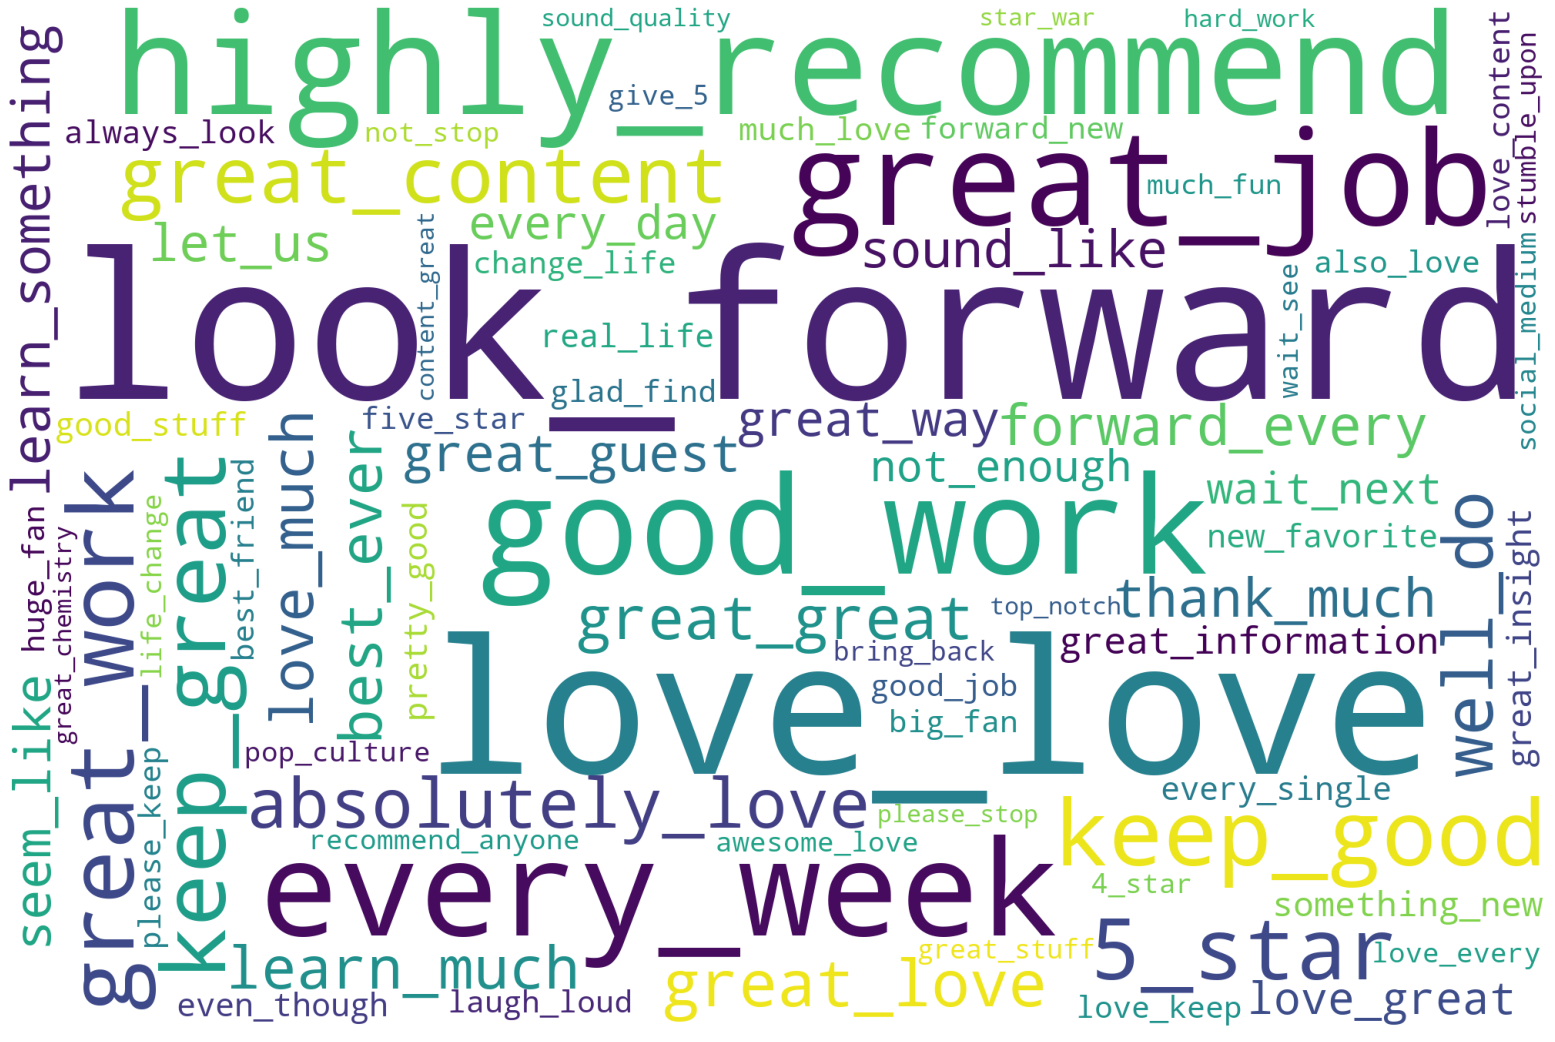

In [271]:
# Positive
# Create bigram
df["bigram_text_positive"] = df["clean_content"][df['sentiment'] == 1].swifter.apply(get_ngrams, n = 2)

content_string_list = df['bigram_text_positive'].dropna().tolist()
content_string_positive = ' '.join(content_string_list)
positive = content_string_positive.split(" ")
join_positive = ' '.join([word for word in positive if word not in ('can_not', 'feel_like', 'not_wait', 'true_crime', '_NUMBER_star')])
wordcloud = WordCloud(width = 2000, height = 1334, random_state = 1, 
                      background_color = 'white', max_words = 75, collocations = False, normalize_plurals = False).generate(join_positive)

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize = (25, 17), dpi = 80)
    plt.tight_layout(pad = 0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close()
plot_cloud(wordcloud)

# can_not, feel_like, not_wait, true_crime, _NUMBER_star

Pandas Apply:   0%|          | 0/21751 [00:00<?, ?it/s]

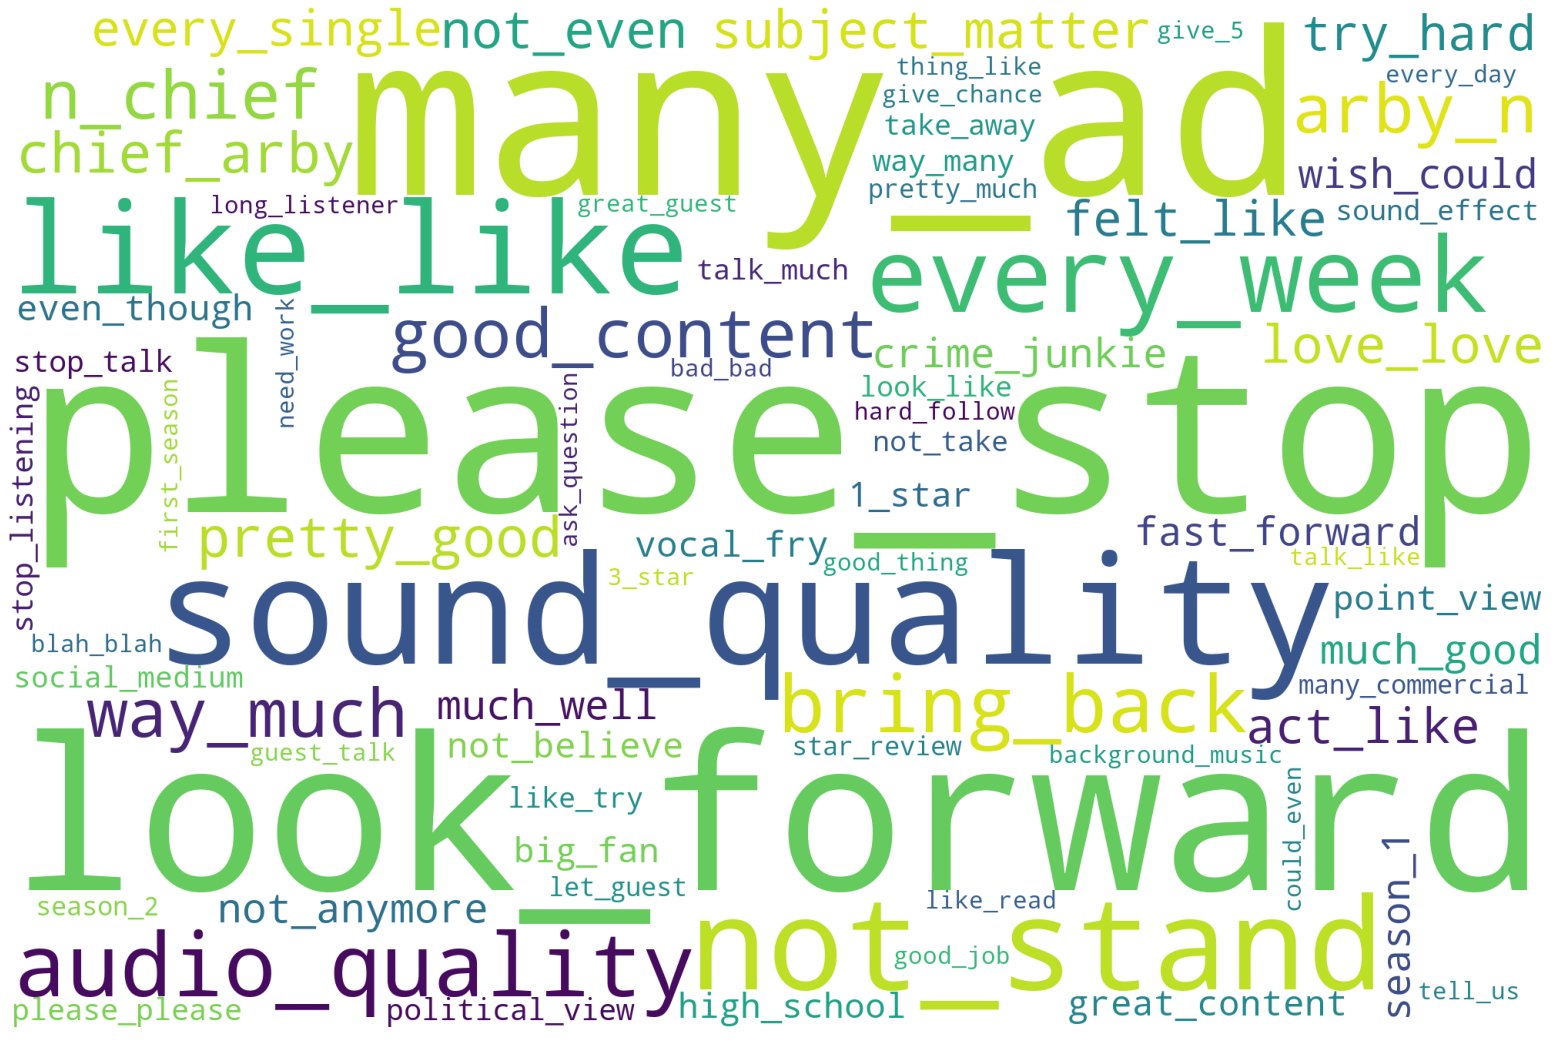

In [275]:
# Negative
# Create bigram
df["bigram_text_negative"] = df["clean_content"][df['sentiment'] == 0].swifter.apply(get_ngrams, n = 2)

content_string_list = df['bigram_text_negative'].dropna().tolist()
content_string_negative = ' '.join(content_string_list)
negative = content_string_negative.split(" ")
join_negative = ' '.join([word for word in negative if word not in ('sound_like', 'can_not', 'feel_like', 'seem_like', 'true_crime', 'let_us', '5_star')])
wordcloud = WordCloud(width = 2000, height = 1334, random_state = 1, 
                      background_color = 'white', max_words = 75, collocations = False, normalize_plurals = False).generate(join_negative)

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize = (25, 17), dpi = 80)
    plt.tight_layout(pad = 0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close()
plot_cloud(wordcloud)

# sound_like, can_not, feel_like, seem_like, true_crime, _NUMBER_star, _NUMBER_min, _NUMBER_old, _NUMBER__NUMBER_, first_NUMBER_